In [ ]:
!pip install transformers[torch]
!pip install evaluate
!pip install accelerate -U
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carico il dataset
df_tot = pd.read_csv("news_articles_dataset_mod_v1.csv", sep=",", on_bad_lines="skip")

# Filtro il dataset per le categorie desiderate
# df = df_tot[df_tot['Category'].isin(['Finance', 'Health', 'Technology', 'Sports'])]
df = df_tot[df_tot['Category'].isin(['Finance', 'Health', 'Technology', 'Sports'])]

# Suddivido il dataset in training (80%), validation (10%), e test set (10%)
train_set, temp = train_test_split(df, test_size=0.2, random_state=42)
validation_set, test_set = train_test_split(temp, test_size=0.5, random_state=42)

# Controllo le dimensioni dei dataset
print("Training set:", len(train_set))
print("Validation set:", len(validation_set))
print("Test set:", len(test_set))


Training set: 3315
Validation set: 414
Test set: 415


In [ ]:
display(train_set)

,Text,Category
3935,Share Share Article via Facebook Share Article...,Finance
178,Netflix’s next sports docuseries follows the B...,Technology
668,Garland addresses massive resource imbalance b...,Technology
3334,Check out the companies making headlines in pr...,Finance
787,Engadget has been testing and reviewing consum...,Technology
...,...,...
3444,Reddit CEO Steve Huffman and New York Stock Ex...,Finance
466,The 2021 Game Developers Conference will be en...,Technology
3092,Apple CEO Tim Cook attends the Wonderlust even...,Finance
3772,Bitcoin has been struggling since the launch o...,Finance


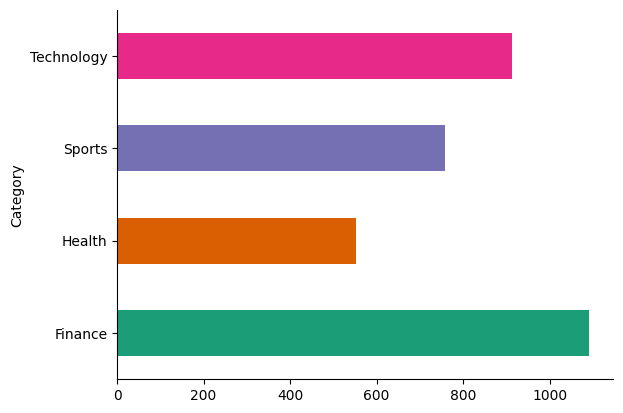

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
train_set.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# TF/IDF

Valutazione sul set di test:
              precision    recall  f1-score   support

     Finance       0.90      0.96      0.93       123
      Health       0.59      0.48      0.53        81
      Sports       0.70      0.68      0.69        94
  Technology       0.87      0.94      0.90       117

    accuracy                           0.80       415
   macro avg       0.77      0.77      0.76       415
weighted avg       0.79      0.80      0.79       415



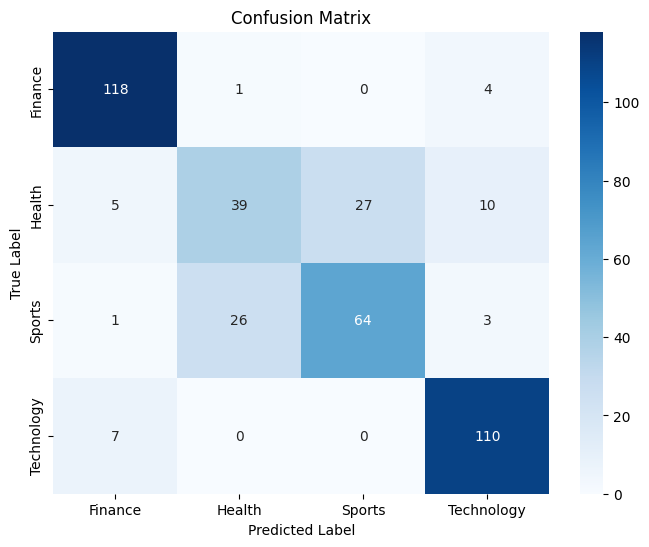

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione del vettorizzatore TF-IDF
vectorizer = TfidfVectorizer()

# Trasformazione del testo in features utilizzando TF-IDF
X_train = vectorizer.fit_transform(train_set['Text'])
X_val = vectorizer.transform(validation_set['Text'])
X_test = vectorizer.transform(test_set['Text'])

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, train_set['Category'])

test_predictions = logistic_model.predict(X_test)
print("Valutazione sul set di test:")
print(classification_report(test_set['Category'], test_predictions))

#------------Statistiche----------------------
report = classification_report(test_set['Category'], test_predictions, output_dict=True)

accuracy_tf = report['accuracy']
precision_tf = report['weighted avg']['precision']
recall_tf = report['weighted avg']['recall']
f1_tf = report['weighted avg']['f1-score']

#--------------------------------------------------------------------

conf_matrix = confusion_matrix(test_set['Category'], test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

Valutazione sul set di test:
              precision    recall  f1-score   support

     Finance       0.89      0.89      0.89       123
      Health       0.52      0.65      0.58        81
      Sports       0.74      0.52      0.61        94
  Technology       0.85      0.91      0.88       117

    accuracy                           0.77       415
   macro avg       0.75      0.74      0.74       415
weighted avg       0.77      0.77      0.76       415



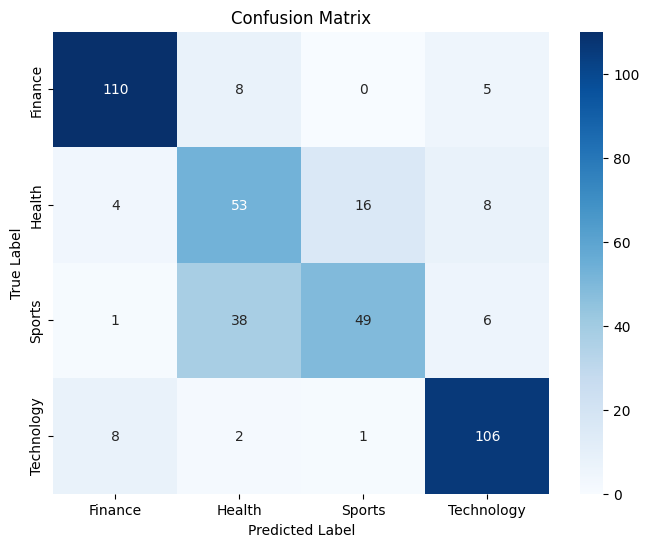

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione del vettorizzatore di conteggio
vectorizer = CountVectorizer()

# Trasformazione del testo in features (conteggio delle parole)
X_train = vectorizer.fit_transform(train_set['Text'])
X_val = vectorizer.transform(validation_set['Text'])
X_test = vectorizer.transform(test_set['Text'])

nb_model = MultinomialNB()

nb_model.fit(X_train, train_set['Category'])

test_predictions = nb_model.predict(X_test)
print("Valutazione sul set di test:")
print(classification_report(test_set['Category'], test_predictions))
#-----------Statistiche-------------------------

report = classification_report(test_set['Category'], test_predictions, output_dict=True)

accuracy_nb = report['accuracy']
precision_nb = report['weighted avg']['precision']
recall_nb = report['weighted avg']['recall']
f1_nb = report['weighted avg']['f1-score']

#----------------------------------------------------------------------

conf_matrix = confusion_matrix(test_set['Category'], test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Valutazione sul set di test:
              precision    recall  f1-score   support

     Finance       0.95      0.96      0.96       123
      Health       0.53      0.43      0.48        81
      Sports       0.59      0.67      0.63        94
  Technology       0.95      0.97      0.96       117

    accuracy                           0.79       415
   macro avg       0.76      0.76      0.75       415
weighted avg       0.79      0.79      0.79       415



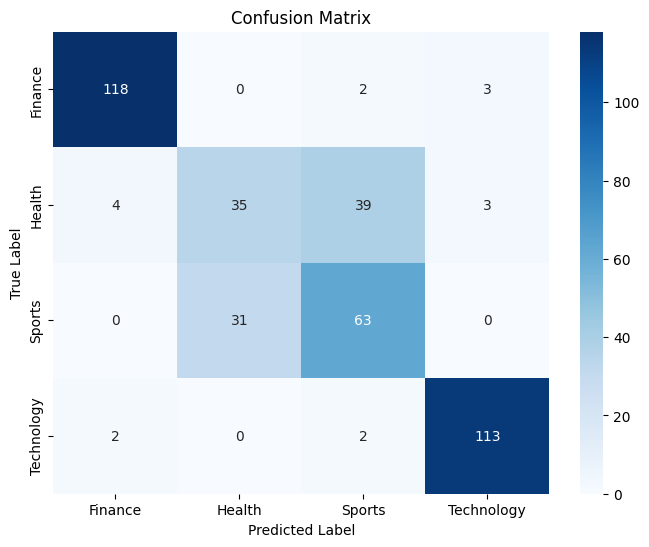

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione del vettorizzatore di conteggio
vectorizer = CountVectorizer()

# Trasformazione del testo in features (conteggio delle parole)
X_train = vectorizer.fit_transform(train_set['Text'])
X_val = vectorizer.transform(validation_set['Text'])
X_test = vectorizer.transform(test_set['Text'])

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train, train_set['Category'])

test_predictions = logistic_model.predict(X_test)
print("Valutazione sul set di test:")
print(classification_report(test_set['Category'], test_predictions))

#-----------Statistiche-------------------------

report = classification_report(test_set['Category'], test_predictions, output_dict=True)

accuracy_lr = report['accuracy']
precision_lr = report['weighted avg']['precision']
recall_lr = report['weighted avg']['recall']
f1_lr = report['weighted avg']['f1-score']

#--------------------------------------------------------------------

conf_matrix = confusion_matrix(test_set['Category'], test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# RandomForest

Valutazione sul set di test:
              precision    recall  f1-score   support

     Finance       0.85      0.97      0.90       123
      Health       0.44      0.23      0.31        81
      Sports       0.61      0.72      0.66        94
  Technology       0.90      0.93      0.92       117

    accuracy                           0.76       415
   macro avg       0.70      0.71      0.70       415
weighted avg       0.73      0.76      0.74       415



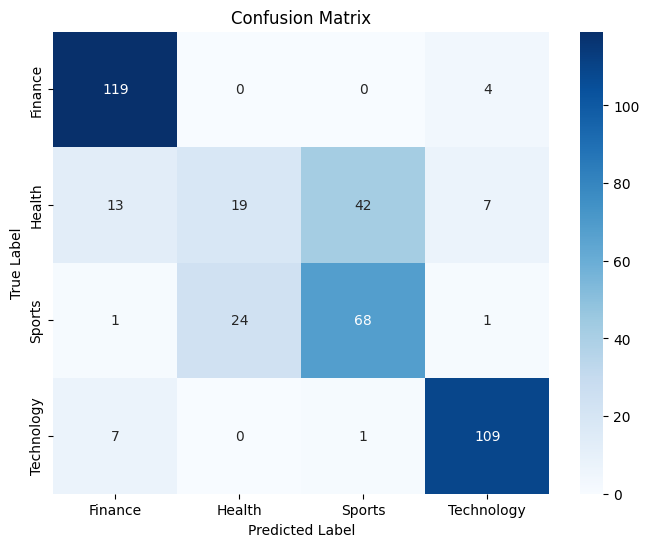

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione del vettorizzatore di conteggio
vectorizer = CountVectorizer()

# Trasformazione del testo in features (conteggio delle parole)
X_train = vectorizer.fit_transform(train_set['Text'])
X_val = vectorizer.transform(validation_set['Text'])
X_test = vectorizer.transform(test_set['Text'])

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, train_set['Category'])

test_predictions = random_forest_model.predict(X_test)
print("Valutazione sul set di test:")
print(classification_report(test_set['Category'], test_predictions))

#-----------Statistiche-------------------------

report = classification_report(test_set['Category'], test_predictions, output_dict=True)

accuracy_rf = report['accuracy']
precision_rf = report['weighted avg']['precision']
recall_rf = report['weighted avg']['recall']
f1_rf = report['weighted avg']['f1-score']

#---------------------------------------------------------------------------

conf_matrix = confusion_matrix(test_set['Category'], test_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Neural network

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Creazione del vettorizzatore di conteggio per estrarre le features dal testo
vectorizer = tf.keras.layers.TextVectorization(max_tokens=10000, output_mode='tf-idf')
vectorizer.adapt(train_set['Text'].values)

# Trasformazione del testo in features utilizzando il vettorizzatore
X_train = vectorizer(train_set['Text'].values)
X_val = vectorizer(validation_set['Text'].values)
X_test = vectorizer(test_set['Text'].values)

# Encoding delle etichette di classe
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_set['Category'])
y_val = label_encoder.transform(validation_set['Category'])
y_test = label_encoder.transform(test_set['Category'])

# Creazione del modello sequenziale
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='sigmoid')
])

adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Conversione delle predizioni in etichette leggibili
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

print(classification_report(test_set['Category'], predicted_labels))

#-----------Statistiche-------------------------

report = classification_report(test_set['Category'], test_predictions, output_dict=True)

accuracy_nn = report['accuracy']
precision_nn = report['weighted avg']['precision']
recall_nn = report['weighted avg']['recall']
f1_nn = report['weighted avg']['f1-score']


Epoch 1/100
52/52 [==============================] - 5s 10ms/step - loss: 1.4306 - accuracy: 0.4519 - val_loss: 0.8226 - val_accuracy: 0.6860
Epoch 2/100
52/52 [==============================] - 0s 7ms/step - loss: 0.9578 - accuracy: 0.6329 - val_loss: 0.7044 - val_accuracy: 0.7077
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.7566 - accuracy: 0.6965 - val_loss: 0.6260 - val_accuracy: 0.7560
Epoch 4/100
52/52 [==============================] - 0s 7ms/step - loss: 0.6368 - accuracy: 0.7529 - val_loss: 0.5563 - val_accuracy: 0.7802
Epoch 5/100
52/52 [==============================] - 0s 7ms/step - loss: 0.5373 - accuracy: 0.7831 - val_loss: 0.5074 - val_accuracy: 0.7995
Epoch 6/100
52/52 [==============================] - 0s 6ms/step - loss: 0.4798 - accuracy: 0.8030 - val_loss: 0.4713 - val_accuracy: 0.8019
Epoch 7/100
52/52 [==============================] - 0s 7ms/step - loss: 0.4418 - accuracy: 0.8184 - val_loss: 0.4458 - val_accuracy: 0.8140
Epoch 8/100


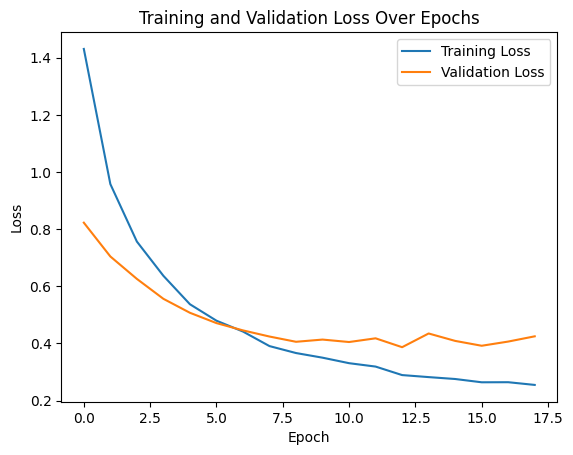

In [ ]:
# plt.plot(history["loss"])
# plt.plot(history["val_loss"])

import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Neural network with Word embeddings

In [ ]:
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

glove_model = api.load('word2vec-google-news-300')

# Preparazione dei dati
train_texts = train_set['Text'].values
val_texts = validation_set['Text'].values
test_texts = test_set['Text'].values

# Tokenizzazione del testo
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_val = tokenizer.texts_to_sequences(val_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

print(X_train)

# Padding delle sequenze
max_sequence_length = 100
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_val = pad_sequences(X_val, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Creazione della matrice di embedding
word_index = tokenizer.word_index
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in glove_model:
        embedding_vector = glove_model[word]
        embedding_matrix[i] = embedding_vector

# Encoding delle etichette di classe
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_set['Category'])
y_val = label_encoder.transform(validation_set['Category'])
y_test = label_encoder.transform(test_set['Category'])

# Creazione del modello sequenziale con embedding
model = Sequential([
    Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

adam_optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Conversione delle predizioni in etichette leggibili
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

print(classification_report(test_set['Category'], predicted_labels))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/100
52/52 [==============================] - 20s 287ms/step - loss: 1.0448 - accuracy: 0.5557 - val_loss: 1.4525 - val_accuracy: 0.3261
Epoch 2/100
52/52 [==============================] - 15s 280ms/step - loss: 0.7074 - accuracy: 0.7219 - val_loss: 1.1656 - val_accuracy: 0.3889
Epoch 3/100
52/52 [==============================] - 18s 342ms/step - loss: 0.5814 - accuracy: 0.7647 - val_loss: 0.7866 - val_accuracy: 0.7101
Epoch 4/100
52/52 [==============================] - 15s 297ms/step - loss: 0.4787 - accuracy: 0.7991 - val_loss: 0.7043 - val_accuracy: 0.7150
Epoch 5/100
52/52 [==============================] - 15s 285ms/step - loss: 0.4308 - accuracy: 0.8118 - val_loss: 0.7456 - val_accuracy: 0.6981
Epoch 6/100
52/52 [==============================] - 15s 292ms/step - loss: 0.3814 - accuracy: 0.8314 - val_loss: 0.9636 - val_accuracy: 0.6836
Epoch 7/100
52/52 [==============================] - 15s 284ms/step - loss: 0.3257 - accuracy: 0.8525 - val_loss: 0.5715 - val_accuracy:

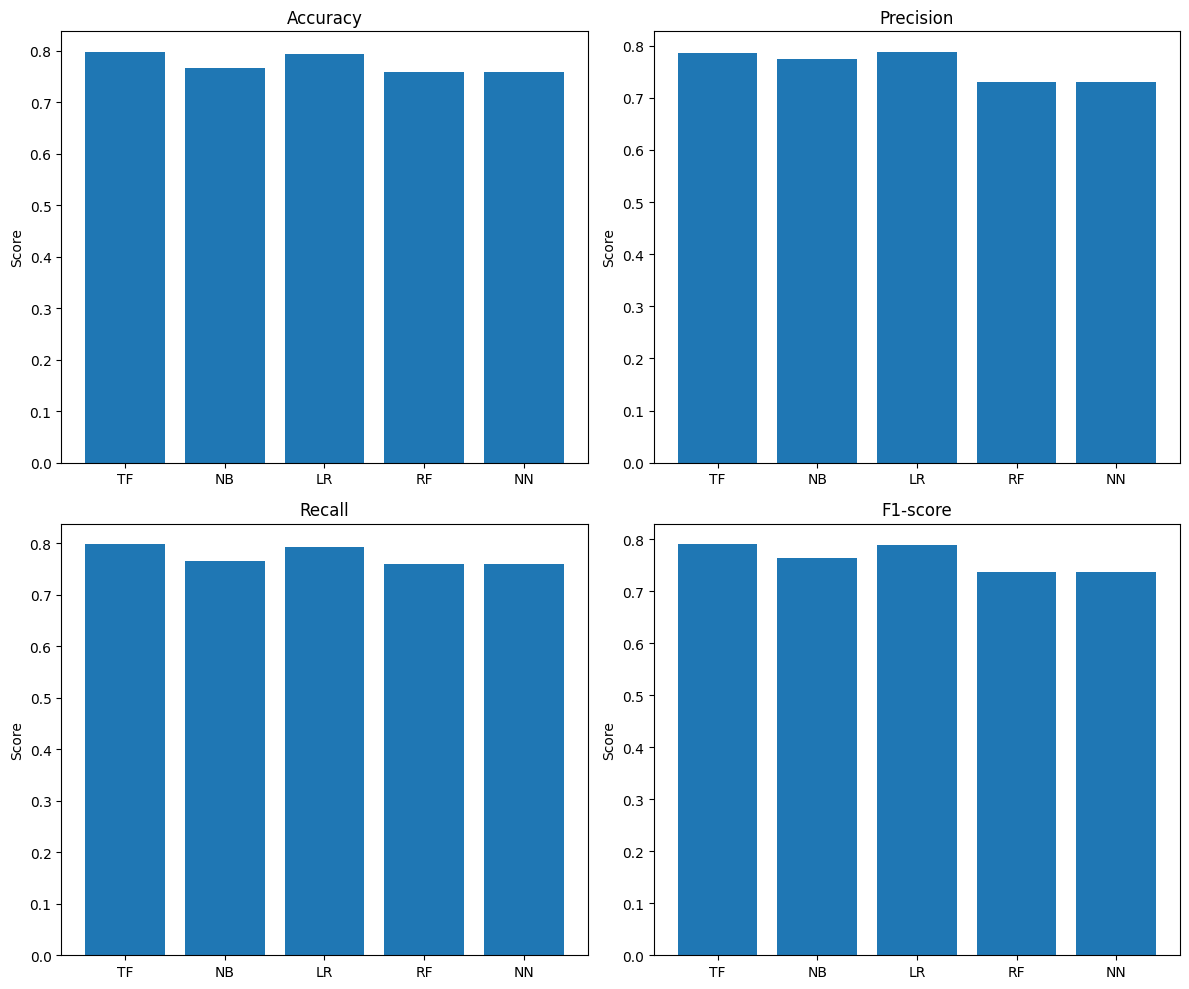

In [ ]:
import matplotlib.pyplot as plt

# Metriche di valutazione per ogni modello
model_names = ['TF','NB', 'LR', 'RF', 'NN']
accuracy_scores = [accuracy_tf, accuracy_nb, accuracy_lr, accuracy_rf, accuracy_nn]
precision_scores = [precision_tf, precision_nb, precision_lr, precision_rf, precision_nn]
recall_scores = [recall_tf, recall_nb, recall_lr, recall_rf, recall_nn]
f1_scores = [f1_tf, f1_nb, f1_lr, f1_rf, f1_nn]

# Plot delle differenze nelle prestazioni
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
ax[0, 0].bar(model_names, accuracy_scores)
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Score')

# Precision
ax[0, 1].bar(model_names, precision_scores)
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Score')

# Recall
ax[1, 0].bar(model_names, recall_scores)
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Score')

# F1-score
ax[1, 1].bar(model_names, f1_scores)
ax[1, 1].set_title('F1-score')
ax[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# BERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer
import datasets
from sklearn.preprocessing import LabelEncoder
import os

pretrained_model = "dbmdz/bert-base-italian-uncased"
pretrained_model = "bert-base-multilingual-uncased"

tokenizer = AutoTokenizer.from_pretrained(pretrained_model)

# Carica il dataset
df_tot = pd.read_csv("news_articles_dataset_mod_v1.csv")

df = df_tot[['Text', 'Category']]

df = df.rename(columns={"Text": "text", "Category": "label"})

# Convert the labels to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Create a train, validation and test dataset from df
df_train, df_test = train_test_split(df, test_size=0.3, random_state=13)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=13)

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

dataset = datasets.DatasetDict({"train": train_dataset, "validation": val_dataset, "test": test_dataset})

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenized_datasets

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Map:   0%|          | 0/2320 [00:00<?, ? examples/s]

Map:   0%|          | 0/580 [00:00<?, ? examples/s]

Map:   0%|          | 0/1244 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2320
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 580
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1244
    })
})

In [ ]:
from transformers import AutoModelForSequenceClassification
labels = len(df["label"].unique())
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model, num_labels=4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import evaluate
metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.388753,0.829310
2,0.581500,0.351619,0.862069
3,0.581500,0.279880,0.893103


TrainOutput(global_step=870, training_loss=0.4645411875056124, metrics={'train_runtime': 804.4608, 'train_samples_per_second': 8.652, 'train_steps_per_second': 1.081, 'total_flos': 1831285829468160.0, 'train_loss': 0.4645411875056124, 'epoch': 3.0})

In [ ]:
trainer.save_model(pretrained_model+"_NEWS")

In [ ]:
from transformers import pipeline

text_classifier = pipeline(

    task="text-classification", model=pretrained_model+"_NEWS",
    tokenizer = tokenizer,

)

In [ ]:
verbose = True
full = True
test_subset = tokenized_datasets["test"]
labels = label_encoder.classes_

if not full:
  N=20
  test_subset=test_subset.shuffle(seed=77).select(range(N))

y_pred = []
y_true = []

for num in range(len(test_subset)):

  if num % 10 == 0:
    print ("Ho classificato "+str(num)+" su "+str(len(test_subset))+" esempi")

  preds = text_classifier(test_subset[num]['text'][0:512])
  y_pred.append(int(preds[0]['label'].split('_')[-1]))
  y_true.append(int(test_subset[num]['label']))
  if verbose:
    if int(y_true[-1]) != int(y_pred[-1]):
      print ('classificazione: ', labels[y_pred[-1]])
      print ('ground truth: ', labels[y_true[-1]])
      print (test_subset[num]['text'])

print(classification_report(y_true, y_pred, target_names=labels))

Output streaming troncato alle ultime 5000 righe.
The second is it will likely happen again. The Dubrovka attack was followed two years later by airplanes being blown out of the sky and the catastrophic nightmare of the Beslan school siege. Russia was seen as weak in its most sacred spaces, and more disturbed young Islamists were able to take advantage.

The wider change here is in Russia’s relationship with the West. In 2002, Dubrovka forced Moscow reluctantly yet closer to the United States’ war on terror. Two decades ago, it felt the White House and the Kremlin briefly had common purpose. Now, Moscow finds itself ignoring and politicising Western intelligence warnings about an attack, it then seeks to partially blame on the West, simply because it seems to know – and warn - about the possibility of an attack in advance.

Friday night’s attacks herald a new dark chapter for Putin, one that is deeply familiar to him. An enemy within that his brutal and relentless tactics cannot fully 